## Predicting Fires in the Algerian Forest from Weather Characteristics
### Introduction
A forest fire, also called wildfire, is an unplanned, unwanted and uncontrolled fire which can occur by lightning or human carelessness in forests, shrublands and grasslands. The natural leading causes of forest fires are dry climate, hot temperatures, lightning and volcanic eruption. 
 
There are many factors that contribute to wildfires and thus, we pose a predictive question to determine whether or not duff moisture, drought, fire buildup, fire spread, and fire-weather index cause an increase in the likelihood of forest fires. Furthermore, by looking at these predictors from the exploratory data analysis graph, we hypothesize that an increase in the variables mentioned previously will likely increase the predictability whether or not a fire will be instigated.
 
In order to support our hypothesis, we are using a dataset on Algerian Forest Fires from UCI Machine Learning Repository. The dataset contains a culmination of forest fires in two regions of Algeria: 122 instances from the Bejaia region and 122 instances in Sidi Bel-Abbes region. The timeline of this dataset was taken from June 2012 to September 2012. Specifically, we will be focusing on whether certain weather characteristics can predict forest fires in these regions.




In [92]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(GGally)
set.seed(1)

### Reading Data into R:

In [82]:
forest_fire<-read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv', skip=1)%>%
    select(-day, -month, -year)%>%
        filter(Classes!='Classes',
                Temperature!='NA',
                  RH!='NA',
                  Rain!='NA',
                    Ws!='NA',
                   FFMC!="NA",
                   DMC!="NA",
                   DC!="NA",
                   ISI!="NA",
                   BUI!="NA",
                   FWI!="NA") %>%
    mutate(Classes=as_factor(Classes),
        Temperature=as.numeric(Temperature),   
        RH=as.numeric(RH),
        Rain=as.numeric(Rain),
        Ws=as.numeric(Ws),
        FFMC=as.numeric(FFMC),
        DMC=as.numeric(DMC),
        DC=as.numeric(DC),
        ISI=as.numeric(ISI),
        BUI=as.numeric(BUI),
        FWI=as.numeric(FWI)) 

forest_fire

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire


### Preliminary Exploratory Data Analysis: Summarizing Training Data

In [98]:
forest_fire_split<- initial_split(forest_fire, pop= 0.75, strata= Classes)
forest_fire_train<-training(forest_fire_split)
forest_fire_test<-training(forest_fire_split)

forest_fire_train

Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire
26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,fire
27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,not fire


We chose the prop to 75% since the orignal data set we assessed it to be small (249 entries). By proping to 75%, we will be able to give the training set more samples of the data, which will result in yielding more accurate outcomes for our test dataset.

In [99]:
ff_summary<- group_by(forest_fire_train, Classes)%>%
    summarize(
    avg_temperature= mean(Temperature),
        avg_rh=mean(RH),
        avg_ws=mean(Ws),
        avg_rain=mean(Rain),
        avg_ffmc=mean(FFMC),
        avg_dmc=mean(DMC),
        avg_dc=mean(DC),
        avg_isi=mean(ISI),
        avg_bui=mean(BUI),
        avg_fwi=mean(FWI)
    )
ff_summary

`summarise()` ungrouping output (override with `.groups` argument)



Classes,avg_temperature,avg_rh,avg_ws,avg_rain,avg_ffmc,avg_dmc,avg_dc,avg_isi,avg_bui,avg_fwi
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
not fire,29.97500,69.95000,15.6625,1.57375000,65.33375,6.64875,23.76250,1.285000,7.50500,1.01625
fire,33.65049,56.97087,15.3301,0.06213592,87.36311,21.12524,72.08155,7.182524,24.21553,11.57282


###  Preliminary Exploratory Data Analysis: Visualizing Training Data 

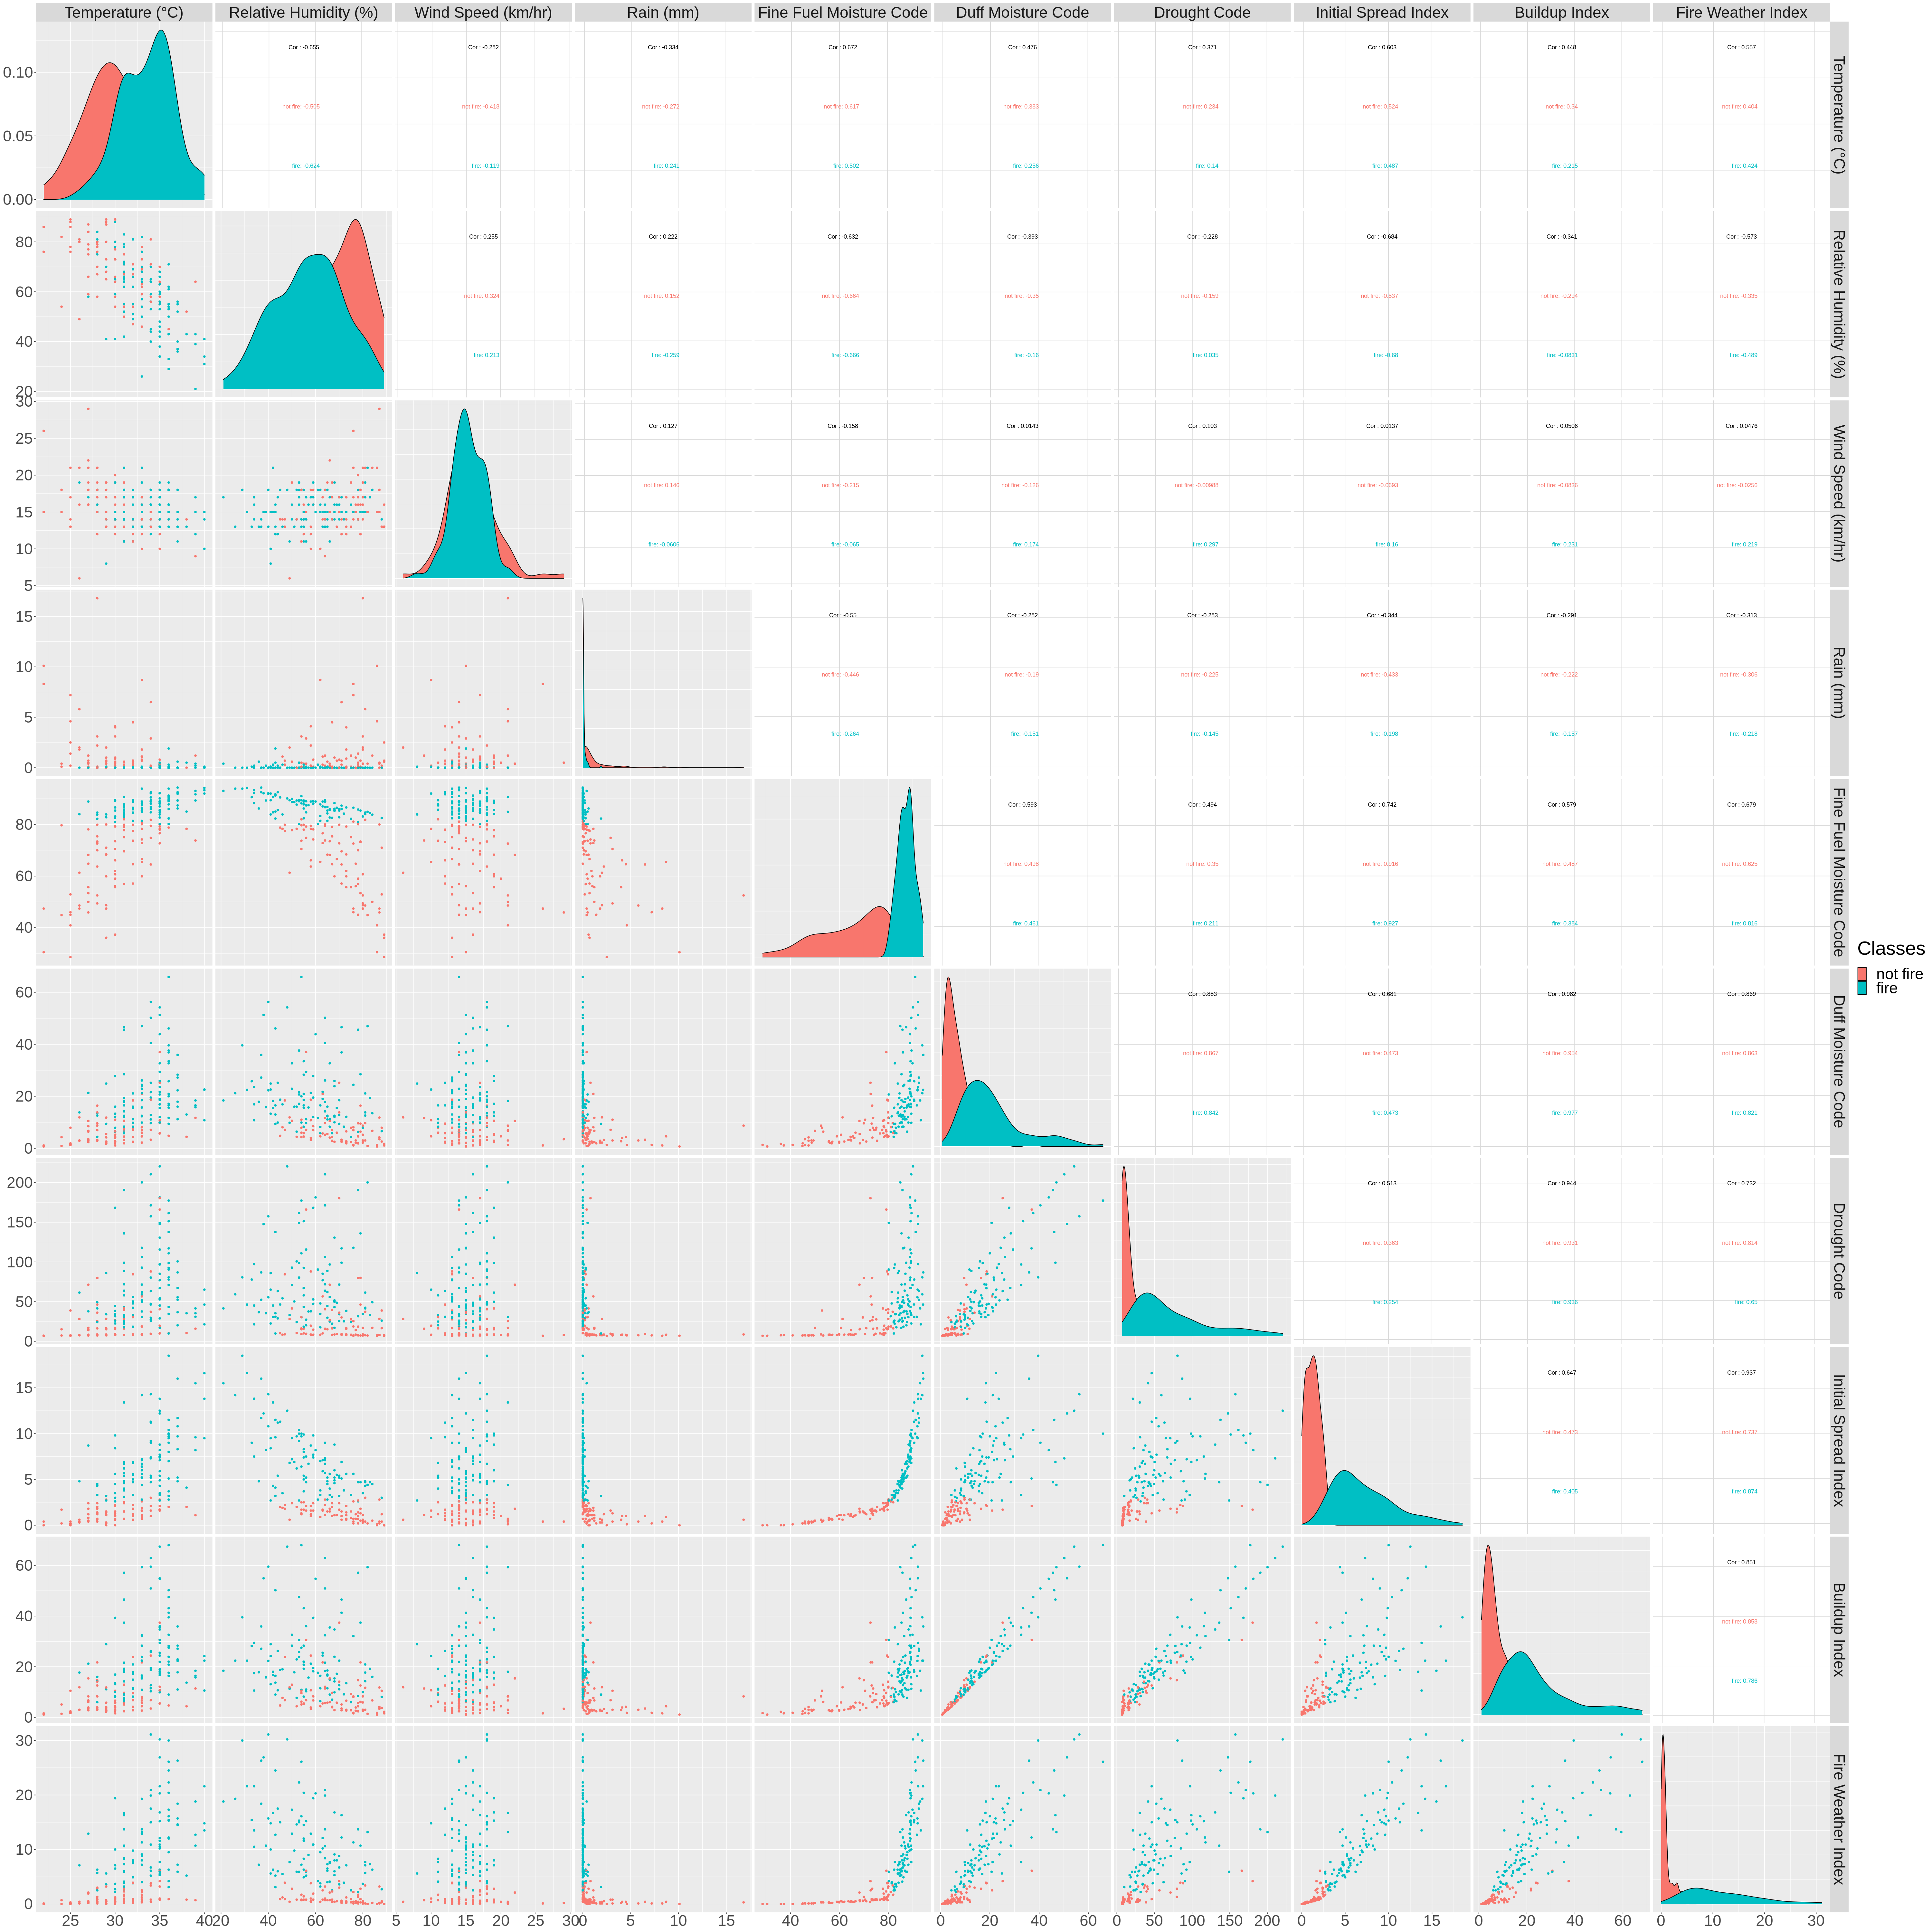

In [100]:
options(repr.plot.width=50, repr.plot.height=50)
forest_fire_graph <- forest_fire_train %>%
    ggpairs(columns =c('Temperature', 'RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI'),
            columnLabels=c('Temperature (°C)', 'Relative Humidity (%)','Wind Speed (km/hr)', 'Rain (mm)','Fine Fuel Moisture Code','Duff Moisture Code',
                           'Drought Code','Initial Spread Index', 'Buildup Index','Fire Weather Index'),
            legend=1,
           aes(color=Classes))+
    theme(text=element_text(size=36))


forest_fire_graph


### Methods

Based on the graph, the variables with the highest correlation found in our initial exploratory graph will be chosen.  The following varaibles that have been chosen are:
- Duff Moisture Code `DMC`  from range 1.1 to 65.9  
- Drought Code `DC`  from range 7 to 220.4  
- Initial Spread Index `ISI`  from range 0 to 18.5  
- Buildup Index `BUI`  from range 1.1 to 68  
- Fire Weather Index `FWI`  from range 0 to 31.1


This data analysis will be conducted with the classification method. Using the chosen variables, we will determine if an instance of potential fire will be classified as `fire` or `not fire` to determine whether a fire was present.


Our data analysis will be conducted in two main steps: Finding the K value  through 5 fold cross valiadation and then computing the accuracy of our prediction. It should be noted that the 5 fold cross validation will be chosen based on computational capability. The 5 fold validation will be passed in tuning in order to produce a graph that allows us to visualize the optimal K to choose. 

Finally using our K, we will predict our trained data through a classification workflow and then compute the accuracy of the prediction. The results of accuracy will be visualized through the form of a bar graph showing the percentages of correct predictions per predictor. 



